In [3]:
try:       importlib.reload(Jupytils)
except:    import Jupytils
from Jupytils.Charts import *;
showTopbar("Markov Chain Asthma Prediction")
from WeightedMarkov.NaiveMarkov import *
from WeightedMarkov.WeightedHOMVMarkov import *


<IPython.core.display.Javascript object>

In [30]:
def categorize(df, colname="cat", nq=10):
    lnq=list(range(0,nq))
    x = df[colname]
    s= pd.qcut(x, nq, labels=lnq )
    
    name = colname+"_cat"
    df.insert(1,name, s)
    df[name] = df[name].astype(int)
    
    zname = colname+"_zone"
    df.insert(1, zname, 0)

    df.loc[ (df[name] == 0) | (df[name] == 1) | (df[name] ==2), zname] = 0
    df.loc[ (df[name] == 3) | (df[name] == 4) | (df[name] ==5) | (df[name] == 6) | (df[name] == 7) , zname] = 1
    df.loc[ (df[name] == 8) | (df[name] ==9) , zname] = 2
    return df;

#categorize(df,'no2_sum')

In [21]:
han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
patient="leeh2"
patient="hand2"
hand2="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"
fileName = hand2;

# => Load Data
proxies={'http':None, 'https':None}
df = LoadDataSet(fileName, checkForDateTime=False, proxies=proxies);
assert 'pef1' not in df.columns, "This must be old Data"
    
sdttm = df.date + " " + df.time 

if ('sdttm' not in df.columns):
    df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

#==========> Categorize PEF VALUES
#s= pd.qcut(df1.pefmax, 10, labels='a1,a2,a3,a4,a5,a6,a7,a8,a9,a10'.split(','))
nq = 10
lnq=list(range(0,nq))
#s= pd.qcut(df1.pefmax, nq, labels='0,1,2,3,4,5,6,7,8,9'.split(','))
s= pd.qcut(df.pef, nq, labels=lnq )
df.insert(1,"pefcat", s)
#df.pefcat = df.pefcat.astype(str)
df.pefcat = df.pefcat.astype(int)
df.insert(1,"pefcat1", 0)

df.loc[ (df.pefcat == 0) | (df.pefcat == 1) | (df.pefcat ==2), 'pefcat1'] = 0
df.loc[ (df.pefcat == 3) | (df.pefcat == 4) | (df.pefcat ==5) | (df.pefcat==6) | (df.pefcat == 7) , 'pefcat1'] = 1
df.loc[ (df.pefcat == 8) | (df.pefcat ==9) , 'pefcat1' ] = 2


#==========> Categorize precipitationpercent VALUES
s= pd.qcut(df.precipitationpercent, nq, labels=lnq )
df.insert(1,"precipcat", s)
df.precipcat = df.precipcat.astype(int)
df.insert(1,"precipzone", 0)

df.loc[ (df.precipcat == 0) | (df.precipcat == 1) | (df.precipcat ==2), 'precipzone'] = 0
df.loc[ (df.precipcat == 3) | (df.precipcat == 4) | (df.precipcat ==5) | (df.precipcat == 6) | (df.precipcat == 7) , 'precipzone'] = 1
df.loc[ (df.precipcat == 8) | (df.precipcat ==9) , 'precipzone' ] = 2


#================
categorize(df,'no2_sum')

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, time, date, timeofday, dateofmeasure, npt, pef1, pef2, pef3, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)


df['pef_zone1'] = df.pefcat1.astype(str)
#for c in df.columns:
#    if (c.find('avg') >0):
#        print (c)
dff1=df['sdttm ampm pef pef_zone pef_zone1 precipzone no2_sum_zone so2_sum co_sum o3_sum no2_sum pm10_sum temperaturec windspeedms precipitationpercent vaporpressurehpa  airpressurehpa'.split()]
for i,u in enumerate(dff1.pef_zone.unique()):
    dff1.pef_zone[dff1.pef_zone == u]= i+1
    
dff1.pef_zone = dff1.pef_zone.astype(int)
dff1.pef_zone1 = dff1.pef_zone1.astype(int)

df1=dff1
dfAM = df1[df1.ampm == 'am'].copy();
allDays = pd.date_range(dfAM.sdttm.min(), dfAM.sdttm.max(), freq='D')
dfAM.index=dfAM.sdttm;
dfAM=dfAM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')
#dfAM


dfPM = df1[df1.ampm == 'pm'].copy();
allDays = pd.date_range(dfPM.sdttm.min(), dfPM.sdttm.max(), freq='D')
dfPM.index=dfPM.sdttm;
dfPM=dfPM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')

dfAMp= dfAM.copy()
#for c in dfAMp.columns:
#    if (dfAMp[c].dtype == number):
#        scaler = StandardScaler()
#        dfAMp[c] = scaler.fit_transform(dfAMp[c])
#dfAMp   
#dfAM

dfAMq= dfAM.copy()
#for c in dfAMq.columns:
#    if (dfAMq[c].dtype == number):
#        nq = len(dfAM.pef_zone.unique())
#        lnq=list(range(1,nq+1))
##        s= pd.qcut(dfAMq[c], nq, labels=lnq )
        
#        dfAMq[c] = s.astype(int)
#dfAMq
dfAMp


,sdttm,ampm,pef,pef_zone,pef_zone1,precipzone,no2_sum_zone,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,airpressurehpa
2015-01-02 06:24:00,2015-01-02 06:24:00,am,279,1,1,0,0,0.078,12.790,0.428,0.300,990.300,-6.800,1.200,58.000,2.100,1020.500
2015-01-03 06:24:00,2015-01-02 06:24:00,am,279,1,1,0,0,0.078,12.790,0.428,0.300,990.300,-6.800,1.200,58.000,2.100,1020.500
2015-01-04 06:24:00,2015-01-03 07:19:00,am,251,1,0,1,1,0.125,17.045,0.299,0.584,886.283,-9.600,0.600,71.000,2.100,1022.700
2015-01-05 06:24:00,2015-01-05 06:08:00,am,273,1,1,2,2,0.137,22.300,0.106,1.078,1248.967,-2.800,0.000,100.000,5.000,1016.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-16 06:24:00,2016-10-15 06:00:00,am,300,2,2,2,2,0.106,17.980,0.246,1.027,1807.500,11.400,0.100,100.000,13.400,1022.600
2016-10-17 06:24:00,2016-10-17 06:11:00,am,292,1,1,2,1,0.073,13.440,0.279,0.642,1261.567,15.000,0.800,97.000,16.500,1013.400
2016-10-18 06:24:00,2016-10-18 06:00:00,am,286,1,1,2,1,0.066,12.690,0.453,0.625,1205.467,11.900,0.600,100.000,13.800,1016.100
2016-10-19 06:24:00,2016-10-18 06:00:00,am,286,1,1,2,1,0.066,12.690,0.453,0.625,1205.467,11.900,0.600,100.000,13.800,1016.100


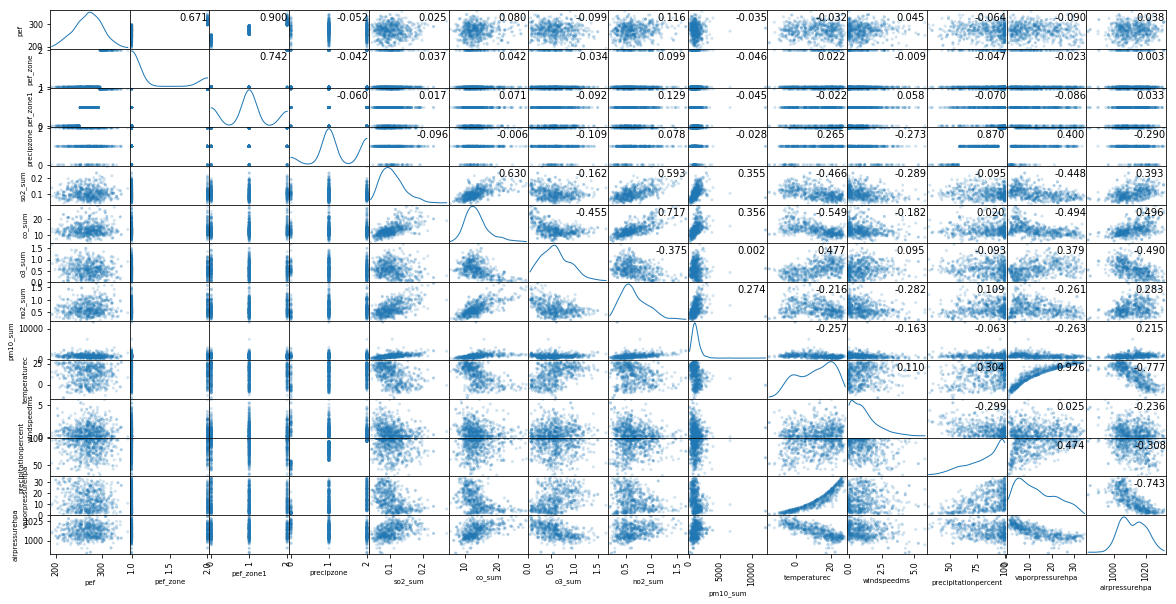

In [9]:
plotScatter = True
if (plotScatter):
    axes=scatter_matrix(dfAMq, alpha=0.2, diagonal='kde', figsize=(20, 10)); # diagonal can be 'hist';
    corr = dfAMq.corr().as_matrix()
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')


In [10]:
HIGHCHARTS_SCRIPTS = """
<script src="//code.highcharts.com/stock/highstock.js"></script>
<script src="//code.highcharts.com/highcharts-more.js"></script>
<script src="//code.highcharts.com/modules/exporting.js"></script>

<style>
.container1 {
    position: relative;
    width: 100%;
    background: white;
    overflow: hidden; /*To get your parent to respect the floated divs*/
}

.dash {
    position: relative;
    width: 50% !important; /*Because you only have 3 elements (100 divided by 3)*/
    height: 250px;
    float: left; /*To get them next to each other if all else fails*/
    background: #eeeeee;
    margins: 100px;
    padding: 10px;
    border: 1px solid gray;
}
</style>

<div class="container1">
    <div id="chart1" class="dash">Div One</div> 
    <div id="chart2" class="dash">Div Two</div>
</div>
"""


display(HTML(HIGHCHARTS_SCRIPTS))

In [11]:
ddf=dfAMq;
PlotHCts(ddf,  ddf.index, 'temperaturec windspeedms precipitationpercent vaporpressurehpa pef_zone'.split(' '), div='chart1', ctype='line', title="Sample Chart for "+ patient );
PlotHCts(ddf,  ddf.index, 'pef_zone pef_zone1'.split(' '), div='chart2', ctype='line', title="Sample Chart for "+ patient );

## SCHAS PEF Predictions start here - Start with Naive Markov

We will use pefzone as we clasified and precipzone as aditional variable for higher order multivariate Markov Chain predictions

In [25]:
X=[dfAMp.pef_zone.values, dfAMp.precipzone.values]
X1=[dfAMp.pef_zone1.values, dfAMp.precipzone.values]

X=[dfAMp.pef_zone.values, dfAMp.precipzone.values, dfAMp.no2_sum_zone.values]
X1=[dfAMp.pef_zone1.values, dfAMp.precipzone.values, dfAMp.no2_sum_zone.values]


In [26]:
def runNaiveMarkov(s1, order = 1, msg=None):
#    m=NaiveMarkov(' ', order)
    m=NaiveMarkov(X=[s1], nStates=6, order=order, delim=' ', n=len(s1))
    m.fit(s1)
    start = tuple([s1[i] for i in range(order)])
    #r = m.Predict(start )
    #NaiveMarkov.Score(s1, r, True, msg="For MC order = {}".format(order))
    r = m.PredictFromList(s1 )
    m.Score(s1, r, msg=msg);

for order in range(1,10,2):
    runNaiveMarkov(X[0], order, "For MC: with seeds taken from original fit tuples Order: {}".format(order))

=======================Metrics :  For MC: with seeds taken from original fit tuples Order: 1
orig=>[1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 1]
pred=>[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1]
Total 657, correct 470, acc: 0.72
class:1 total:530, correct:430, accuracy:0.8113207547169812
class:2 total:127, correct:40, accuracy:0.31496062992125984
=======================Metrics :  For MC: with seeds taken from original fit tuples Order: 3
orig=>[1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 1]
pred=>[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2

In [27]:
for order in range(1,10,2):
    runNaiveMarkov(X1[0], order, "For MC: with seeds taken fit tuples Order: {}".format(order))

=======================Metrics :  For MC: with seeds taken fit tuples Order: 1
orig=>[1 1 0 1 1 1 1 1 1 1 0 2 1 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 0]
pred=>[1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
Total 657, correct 300, acc: 0.46
class:0 total:174, correct:61, accuracy:0.3505747126436782
class:1 total:341, correct:190, accuracy:0.5571847507331378
class:2 total:142, correct:49, accuracy:0.34507042253521125
=======================Metrics :  For MC: with seeds taken fit tuples Order: 3
orig=>[1 1 0 1 1 1 1 1 1 1 0 2 1 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 0]
pred=>[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 

## SCHAS PEF Predictions start here - Now with Weighted Higher Order Multi Variate Markov 


In [28]:
# First print out the fiorst series accuracy and predictions - for ex: PEF predictions
# Second prints out the predictions for seconds series - ex: precipitation and so on ...
#
#
def runHOMVMarkov(X, nStates=3, order=15, msg=None):
    s=len(X)  # => Number of series

    hm = WeightedHOMVMarkov(X, nStates, order)
    f, p, x = hm.fit();
    #h.Dump()
    c,A,b = hm.PrepareMatrices()
    #hm.DisplayCAb(0)
    #hm.DisplayCAb(1)`
    #print ("c=", c, "\nA=\n", A, "\nb=", b)
    sol = hm.Solve(False)
    hm.DumpSolution();

    ac=hm.SelfEval(msg=msg, scoreFirstOnly=False);
    #hm.Score(ac[:,0], X[0][1:],  msg="Test");
    return ac;
    
for order in range(2,12,4):
    P= runHOMVMarkov(X, 3, order, msg="Original PEF: Order="+str(order))
    #break;
P

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Printing the predictions once: 
#: 0, P. Matrix: [ 0.    0.86  0.14], Pred: 1, Actual:1
#: 1, P. Matrix: [ 0.1   0.52  0.37], Pred: 1, Actual:2
#: 2, P. Matrix: [ 0.31  0.51  0.18], Pred: 1, Actual:2
=======================Metrics :  Original PEF: Order=2 Series 1
orig=>[1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2]
pred=>[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Total 655, correct 528, acc: 0.81
class:1 total:528, correct:528, accuracy:1.0
class:2 total:127, correct:0, accuracy:0.0
=======================Metrics :  Original PEF: Order=2 Series 2
orig=>[1 2 2 0 0 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 0 1 1 0 0 1 1 2 2 1 1 1 0 1 2 0 0 1 1 1 1 1 1 2 0 2 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 1 1 1 0 0]
pred=>[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Printing the predictions once: 
#: 0, P. Matrix: [ 0.    0.86  0.14], Pred: 1, Actual:1
#: 1, P. Matrix: [ 0.1   0.52  0.37], Pred: 1, Actual:1
#: 2, P. Matrix: [ 0.31  0.51  0.19], Pred: 1, Actual:2
=======================Metrics :  Original PEF: Order=6 Series 1
orig=>[1 1 1 1 1 2 1 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1]
pred=>[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Total 651, correct 524, acc: 0.80
class:1 total:524, correct:524, accuracy:1.0
class:2 total:127, correct:0, accuracy:0.0
=======================Metrics :  Original PEF: Order=6 Series 2
orig=>[0 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 0 1 1 0 0 1 1 2 2 1 1 1 0 1 2 0 0 1 1 1 1 1 1 2 0 2 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 1 1 1 0 0 1 1 1 2]
pred=>[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Printing the predictions once: 
#: 0, P. Matrix: [ 0.    0.86  0.14], Pred: 1, Actual:2
#: 1, P. Matrix: [ 0.1   0.52  0.37], Pred: 1, Actual:1
#: 2, P. Matrix: [ 0.3   0.51  0.19], Pred: 1, Actual:2
=======================Metrics :  Original PEF: Order=10 Series 1
orig=>[1 2 1 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2]
pred=>[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Total 647, correct 520, acc: 0.80
class:1 total:520, correct:520, accuracy:1.0
class:2 total:127, correct:0, accuracy:0.0
=======================Metrics :  Original PEF: Order=10 Series 2
orig=>[2 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 0 1 1 0 0 1 1 2 2 1 1 1 0 1 2 0 0 1 1 1 1 1 1 2 0 2 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 1 1 1 0 0 1 1 1 2 2 2 1 2]
pred=>[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ..., 
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [29]:
for order in range(2,12,4):
    runHOMVMarkov(X1, 3, order, msg="Our way of splitting PEF: Order="+str(order))
    #break;

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Printing the predictions once: 
#: 0, P. Matrix: [ 0.19  0.62  0.18], Pred: 1, Actual:1
#: 1, P. Matrix: [ 0.11  0.57  0.32], Pred: 1, Actual:2
#: 2, P. Matrix: [ 0.31  0.49  0.2 ], Pred: 1, Actual:2
=======================Metrics :  Our way of splitting PEF: Order=2 Series 1
orig=>[0 1 1 1 1 1 1 1 0 2 1 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 0 2 2]
pred=>[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
Total 655, correct 374, acc: 0.57
class:0 total:174, correct:97, accuracy:0.5574712643678161
class:1 total:339, correct:277, accuracy:0.8171091445427728
class:2 total:142, correct:0, accuracy:0.0
=======================Metrics :  Our way of splitting PEF: Order=2 Series 2
orig=>[1 2 2 0 0 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 0 1 1 0 0 1 1 2 2 1 1 1 0 1 2 0 0 1 1 1 1 1 1 2 0 2 1 1 1 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Printing the predictions once: 
#: 0, P. Matrix: [ 0.19  0.62  0.18], Pred: 1, Actual:1
#: 1, P. Matrix: [ 0.11  0.57  0.32], Pred: 1, Actual:1
#: 2, P. Matrix: [ 0.3   0.49  0.2 ], Pred: 1, Actual:2
=======================Metrics :  Our way of splitting PEF: Order=6 Series 1
orig=>[1 1 1 1 0 2 1 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 0 2 2 1 2 0 1]
pred=>[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0]
Total 651, correct 372, acc: 0.57
class:0 total:173, correct:97, accuracy:0.5606936416184971
class:1 total:336, correct:275, accuracy:0.8184523809523809
class:2 total:142, correct:0, accuracy:0.0
=======================Metrics :  Our way of splitting PEF: Order=6 Series 2
orig=>[0 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 0 1 1 0 0 1 1 2 2 1 1 1 0 1 2 0 0 1 1 1 1 1 1 2 0 2 1 1 1 1 1 0 1 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Printing the predictions once: 
#: 0, P. Matrix: [ 0.19  0.62  0.18], Pred: 1, Actual:2
#: 1, P. Matrix: [ 0.11  0.57  0.32], Pred: 1, Actual:1
#: 2, P. Matrix: [ 0.3   0.49  0.2 ], Pred: 1, Actual:2
=======================Metrics :  Our way of splitting PEF: Order=10 Series 1
orig=>[0 2 1 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 0 2 2 1 2 0 1 1 2 2 2]
pred=>[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
Total 647, correct 368, acc: 0.57
class:0 total:173, correct:97, accuracy:0.5606936416184971
class:1 total:332, correct:271, accuracy:0.8162650602409639
class:2 total:142, correct:0, accuracy:0.0
=======================Metrics :  Our way of splitting PEF: Order=10 Series 2
orig=>[2 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 0 1 1 0 0 1 1 2 2 1 1 1 0 1 2 0 0 1 1 1 1 1 1 2 0 2 1 1 1 1 1 0 1 1 1 0 1